<a href="https://colab.research.google.com/github/mahimscit/DO180-apps/blob/master/CapstoneProjectWalmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CapStone Project(Walmart)**

Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/Walmart DataSet.csv')
print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
print(df.shape)

(6435, 8)


In [8]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [9]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [10]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [15]:
#Data Loading and Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Walmart DataSet.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print(df.head())
print(df.info())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Ho

Correlation between Weekly_Sales and Unemployment: -0.10617608965795429


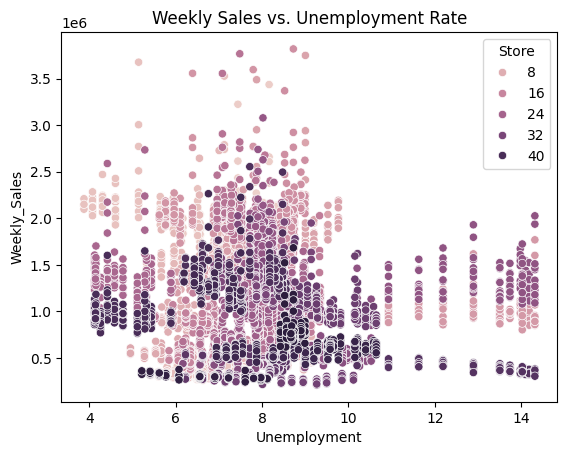

In [19]:

correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation between Weekly_Sales and Unemployment: {correlation}")

sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Store')
plt.title('Weekly Sales vs. Unemployment Rate')
plt.show()

In [20]:
store_data = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean()

store_data = store_data.sort_values(by='Weekly_Sales')

avg_unemployment = df['Unemployment'].mean()
suffering_stores = store_data[store_data['Unemployment'] > avg_unemployment]

sales_percentile_25 = store_data['Weekly_Sales'].quantile(0.25)
suffering_stores = suffering_stores[suffering_stores['Weekly_Sales'] < sales_percentile_25]

print("Stores potentially suffering the most:")
print(suffering_stores)


Stores potentially suffering the most:
        Weekly_Sales  Unemployment
Store                             
33     259861.692028      8.533154
38     385731.653287     13.116483
29     539451.428741      9.806385


If the weekly sales show a seasonal trend, when and what could be the reason?

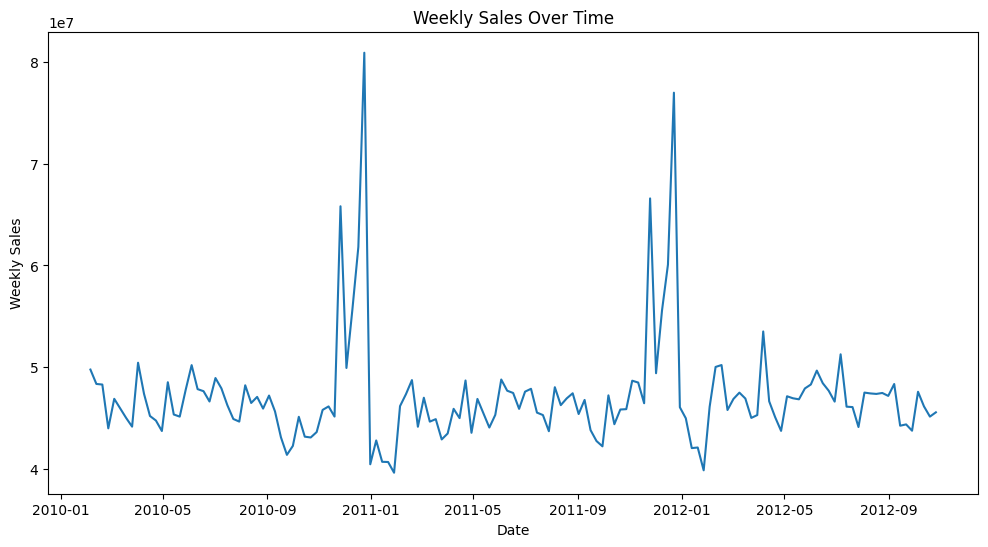

In [22]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.set_index('Date', inplace=True)

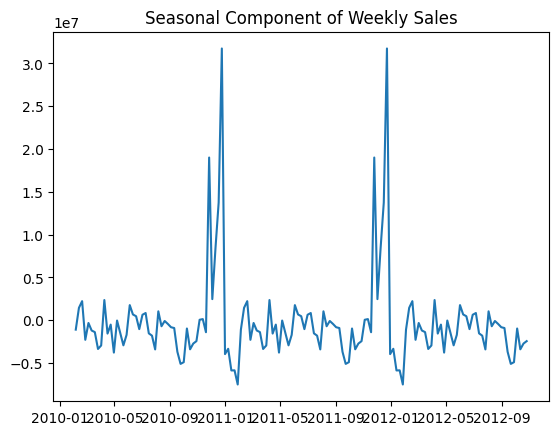

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(weekly_sales['Weekly_Sales'], model='additive', period=52)

seasonal_component = result.seasonal

plt.plot(seasonal_component)
plt.title('Seasonal Component of Weekly Sales')
plt.show()

Does temperature affect the weekly sales in any manner?

In [31]:
correlation = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Weekly_Sales and Temperature: {correlation}")

Correlation between Weekly_Sales and Temperature: -0.06381001317946956


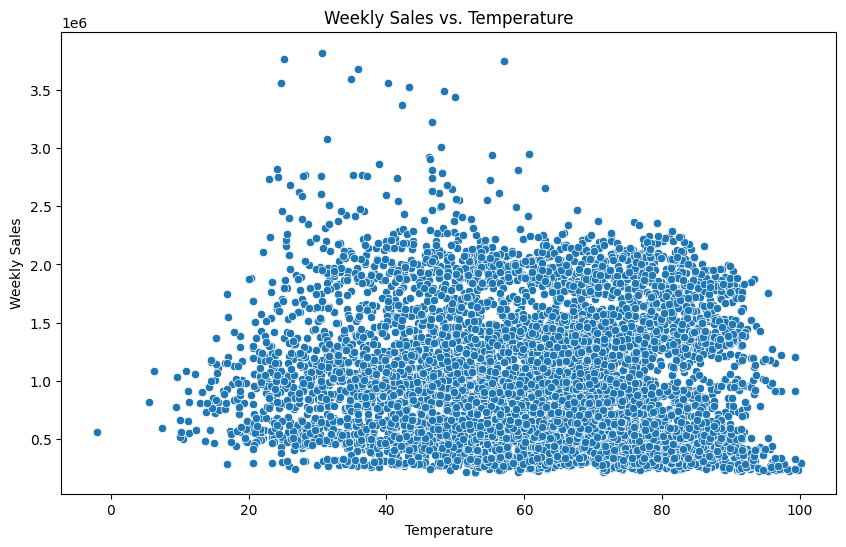

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

How is the Consumer Price index affecting the weekly sales of various stores?

In [34]:
correlation = df['Weekly_Sales'].corr(df['CPI'])
print(f"Correlation between Weekly_Sales and CPI: {correlation}")

Correlation between Weekly_Sales and CPI: -0.07263416204017631


In [35]:
import statsmodels.formula.api as smf
model = smf.ols('Weekly_Sales ~ CPI + Store + Holiday_Flag + Fuel_Price', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     251.4
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          6.21e-201
Time:                        05:47:23   Log-Likelihood:                -93885.
No. Observations:                6435   AIC:                         1.878e+05
Df Residuals:                    6430   BIC:                         1.878e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.734e+06   6.35e+04     27.283   

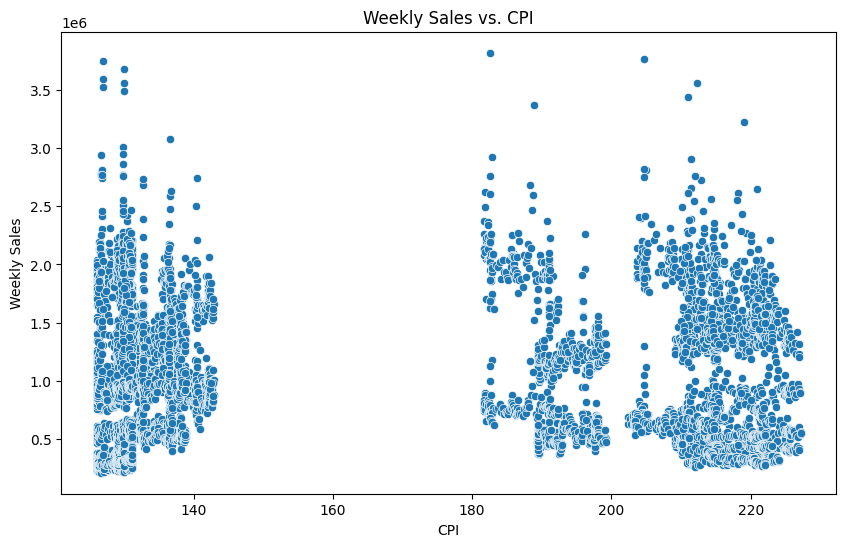

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

Top performing stores according to the historical data.

In [37]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [38]:
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)

In [39]:
print(top_stores.head(10))

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

In [40]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [41]:
worst_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]
print(f"Worst-performing store: Store {worst_store['Store']}, Total Sales: {worst_store['Weekly_Sales']}")

Worst-performing store: Store 33.0, Total Sales: 37160221.96


In [42]:
highest_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
print(f"Highest-performing store: Store {highest_store['Store']}, Total Sales: {highest_store['Weekly_Sales']}")

Highest-performing store: Store 20.0, Total Sales: 301397792.46


In [43]:
difference = highest_store['Weekly_Sales'] - worst_store['Weekly_Sales']
print(f"Difference in total sales: {difference}")

percentage_difference = (difference / highest_store['Weekly_Sales']) * 100
print(f"Percentage difference: {percentage_difference:.2f}%")

Difference in total sales: 264237570.49999997
Percentage difference: 87.67%


2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [44]:
df['Date'] = pd.to_datetime(df['Date'])

df['Lagged_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)

store_data = {}
for store in df['Store'].unique():
    store_df = df[df['Store'] == store][['Date', 'Weekly_Sales', 'Lagged_Sales']]
    store_df.dropna(inplace=True)
    store_df.set_index('Date', inplace=True)
    store_data[store] = store_df

In [45]:
from sklearn.linear_model import LinearRegression
forecasts = {}
for store, data in store_data.items():
    model = LinearRegression()
    X = data[['Lagged_Sales']]
    y = data['Weekly_Sales']
    model.fit(X, y)

    last_sales = data['Weekly_Sales'].iloc[-1]
    forecast = []
    for i in range(12):
        prediction = model.predict([[last_sales]])[0]
        forecast.append(prediction)
        last_sales = prediction

    forecasts[store] = forecast

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

[1535907.2406925336, 1548665.1755761937, 1552517.8272083048, 1553681.254105664, 1554032.5867136314, 1554138.682422525, 1554170.721291649, 1554180.3964156047, 1554183.3181174663, 1554184.2004153891, 1554184.4668524389, 1554184.5473113176]


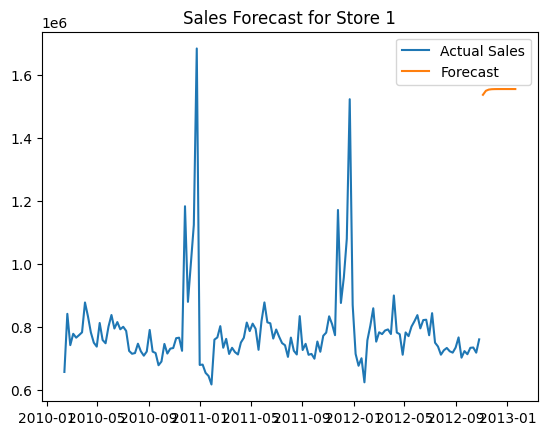

In [46]:
store_1_forecast = forecasts[1]

print(store_1_forecast)

future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(weeks=1), periods=12, freq='W')
plt.plot(data['Weekly_Sales'], label='Actual Sales')
plt.plot(future_dates, store_1_forecast, label='Forecast')
plt.legend()
plt.title(f'Sales Forecast for Store 1')
plt.show()